In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('full_data_proton_speed.csv')

In [27]:
df.columns

Index(['time', 'sample_count', 'measurement_mode', 'measurement_range', 'bt',
       'bx_gse', 'by_gse', 'bz_gse', 'theta_gse', 'phi_gse', 'bx_gsm',
       'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'backfill_flag',
       'future_packet_time_flag', 'old_packet_time_flag', 'fill_flag',
       'possible_saturation_flag', 'calibration_mode_flag', 'maneuver_flag',
       'low_sample_count_flag', 'overall_quality', 'proton_speed'],
      dtype='object')

In [28]:
# keeping important columns
df = df[df.columns[[0, 10, 11, 12, 24]]]
df

,time,bx_gsm,by_gsm,bz_gsm,proton_speed
0,2021-06-27 00:00:00,0.29,4.04,-1.23,378.6
1,2021-06-27 00:01:00,-0.12,4.03,-1.28,376.7
2,2021-06-27 00:02:00,0.14,3.95,-1.69,378.7
3,2021-06-27 00:03:00,0.60,4.02,-1.44,379.1
4,2021-06-27 00:04:00,0.68,4.11,-1.14,379.8
...,...,...,...,...,...
47515,2021-07-29 23:55:00,-4.47,-0.93,1.73,487.1
47516,2021-07-29 23:56:00,-4.54,-0.96,1.54,487.3
47517,2021-07-29 23:57:00,-4.55,-0.95,1.66,488.2
47518,2021-07-29 23:58:00,-4.45,-1.00,1.76,488.0


In [29]:
# filling NaN values with interpolation method
df.interpolate(inplace=True)

In [30]:
# setting new index
df.index = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
del df['time']

In [31]:
df

,bx_gsm,by_gsm,bz_gsm,proton_speed
time,,,,
2021-06-27 00:00:00,0.29,4.04,-1.23,378.6
2021-06-27 00:01:00,-0.12,4.03,-1.28,376.7
2021-06-27 00:02:00,0.14,3.95,-1.69,378.7
2021-06-27 00:03:00,0.60,4.02,-1.44,379.1
2021-06-27 00:04:00,0.68,4.11,-1.14,379.8
...,...,...,...,...
2021-07-29 23:55:00,-4.47,-0.93,1.73,487.1
2021-07-29 23:56:00,-4.54,-0.96,1.54,487.3
2021-07-29 23:57:00,-4.55,-0.95,1.66,488.2


In [32]:
import matplotlib.pyplot as plt

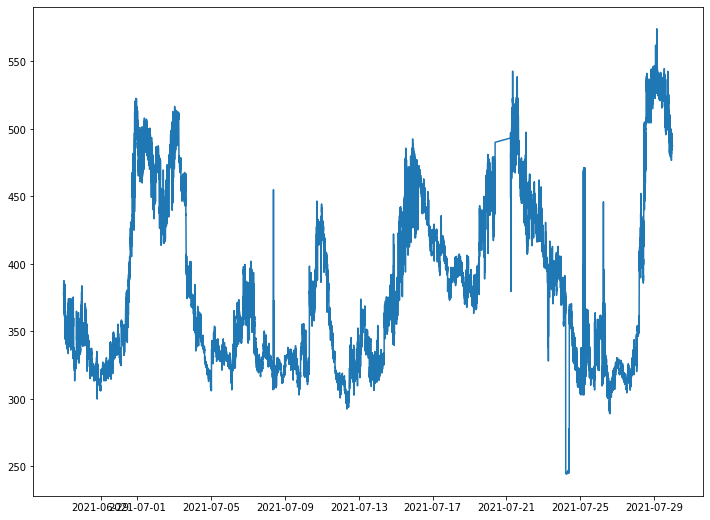

In [33]:
plt.figure(figsize=(12, 9))
plt.plot(df['proton_speed'])

In [34]:
import numpy as np

In [35]:
hourly = df.groupby(np.arange(len(df))//60).mean()

In [36]:
hourly.index = df.index[::60]

In [37]:
hourly

,bx_gsm,by_gsm,bz_gsm,proton_speed
time,,,,
2021-06-27 00:00:00,0.354833,3.980167,-0.149667,376.388333
2021-06-27 01:00:00,-0.359333,4.119500,-0.164333,370.573333
2021-06-27 02:00:00,-3.431500,0.829833,1.755833,350.956667
2021-06-27 03:00:00,-2.695833,2.269167,1.349667,349.491667
2021-06-27 04:00:00,-2.271333,2.166000,0.484500,345.331667
...,...,...,...,...
2021-07-29 19:00:00,-2.334667,4.617500,-1.592000,506.368333
2021-07-29 20:00:00,-3.603500,3.725833,-0.996833,493.001667
2021-07-29 21:00:00,-4.154000,1.640167,0.448333,486.011667


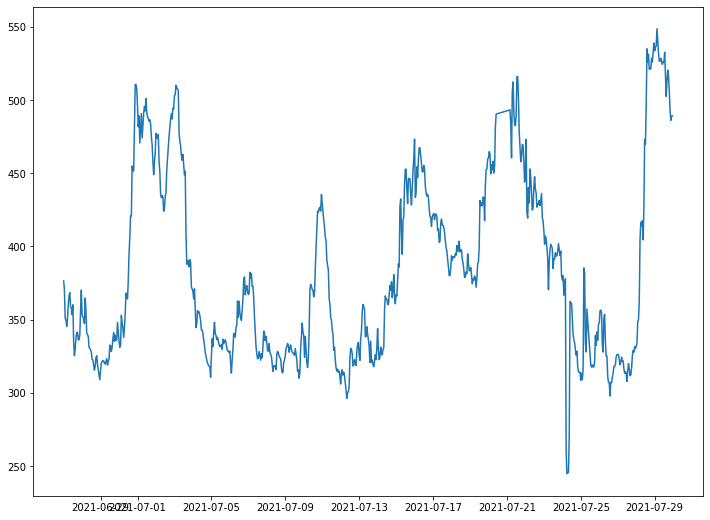

In [38]:
plt.figure(figsize=(12, 9))
plt.plot(hourly['proton_speed'])

In [39]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


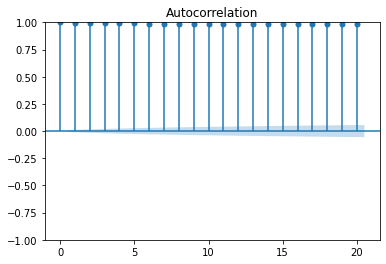

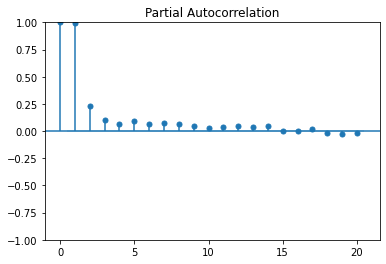

In [40]:
acf_plot = plot_acf(df['proton_speed'], lags=20)
pacf_plot = plot_pacf(df['proton_speed'], lags=20)
plt.show()

In [41]:
first_diff = df.diff()[1:]

C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


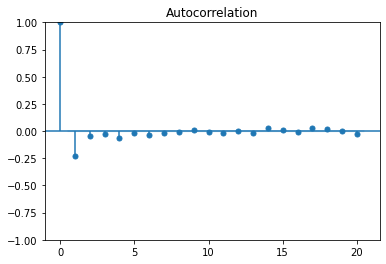

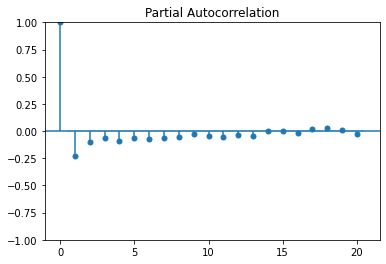

In [42]:
diff_acf_plot = plot_acf(first_diff['proton_speed'], lags=20)
diff_pacf_plot = plot_pacf(first_diff['proton_speed'], lags=20)
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

## Minutely data

In [45]:
adf_test(df['bx_gsm'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.045938e+01
p-value                 1.371675e-18
# lags used             5.500000e+01
# observations          4.746400e+04
critical value (1%)    -3.430488e+00
critical value (5%)    -2.861601e+00
critical value (10%)   -2.566802e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [46]:
adf_test(df['by_gsm'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.626185e+00
p-value                 5.921781e-14
# lags used             5.700000e+01
# observations          4.746200e+04
critical value (1%)    -3.430488e+00
critical value (5%)    -2.861601e+00
critical value (10%)   -2.566802e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [47]:
adf_test(df['bz_gsm'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.222670e+01
p-value                 1.076450e-22
# lags used             5.600000e+01
# observations          4.746300e+04
critical value (1%)    -3.430488e+00
critical value (5%)    -2.861601e+00
critical value (10%)   -2.566802e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [48]:
adf_test(df['proton_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic         -2.511341
p-value                     0.112739
# lags used                57.000000
# observations          47462.000000
critical value (1%)        -3.430488
critical value (5%)        -2.861601
critical value (10%)       -2.566802
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [49]:
df['proton_speed'] = df['proton_speed'].diff()
df.dropna(inplace=True)

In [50]:
adf_test(df['proton_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -34.149777
p-value                     0.000000
# lags used                57.000000
# observations          47461.000000
critical value (1%)        -3.430488
critical value (5%)        -2.861601
critical value (10%)       -2.566802
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [51]:
cols = df.columns

In [52]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [53]:
train_min = df[:-60]
test_min = df[-60:]

In [54]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train_min)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 1
AIC:  -0.4949289674591878
BIC:  -0.49123407918393314



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 2
AIC:  -0.5206030295789914
BIC:  -0.513952106524285

Order = 3
AIC:  -0.5474581648507062
BIC:  -0.5378510966457003



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 4
AIC:  -0.5585392538729131
BIC:  -0.5459759301402318



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 5
AIC:  -0.5657641821208059
BIC:  -0.5502444924765443



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 6
AIC:  -0.5718910137837573
BIC:  -0.5534148478374815



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 7
AIC:  -0.5768775929811734
BIC:  -0.5554448403359193



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 8
AIC:  -0.5797870301063593
BIC:  -0.5553975803586328



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 9
AIC:  -0.5825683132823755
BIC:  -0.5552220560221514



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Order = 10
AIC:  -0.5854415169807425
BIC:  -0.5551383417914642



AIC is minimum when order is 10

In [55]:
model = VAR(train_min)
model_fit = model.fit(10)
model_fit.summary()

C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, May, 2022
Time:                     22:28:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                  -0.555138
Nobs:                     47449.0    HQIC:                 -0.575926
Log likelihood:          -255256.    FPE:                   0.556860
AIC:                    -0.585442    Det(Omega_mle):        0.554939
--------------------------------------------------------------------
Results for equation bx_gsm
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.005080         0.002241           -2.267           0.023
L1.bx_gsm                1.066951         0.004620          230.954           0.000
L1.by_gsm               -0.016601         0.004

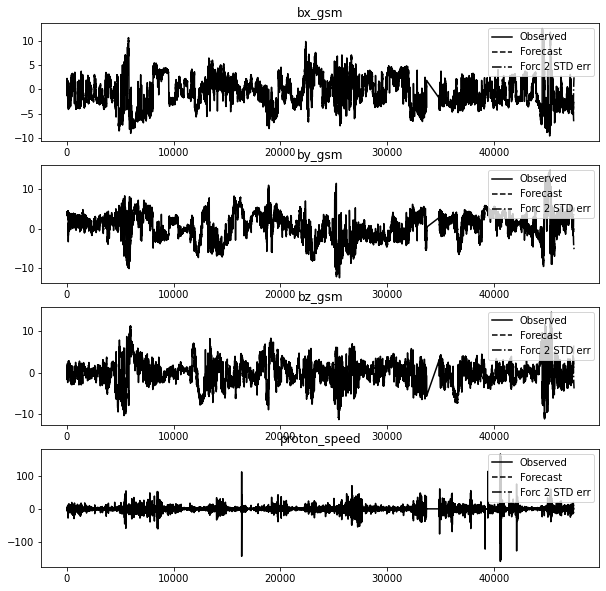

In [56]:
# make prediction on test
model_fit.plot_forecast(steps=len(test_min))
plt.show()

## For hourly data

In [57]:
adf_test(hourly['bx_gsm'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.910457
p-value                   0.000033
# lags used              11.000000
# observations          780.000000
critical value (1%)      -3.438761
critical value (5%)      -2.865253
critical value (10%)     -2.568747
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [58]:
adf_test(hourly['by_gsm'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.716420
p-value                   0.000078
# lags used              12.000000
# observations          779.000000
critical value (1%)      -3.438772
critical value (5%)      -2.865257
critical value (10%)     -2.568749
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [59]:
adf_test(hourly['bz_gsm'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.155605e+01
p-value                 3.357061e-21
# lags used             1.000000e+00
# observations          7.900000e+02
critical value (1%)    -3.438655e+00
critical value (5%)    -2.865205e+00
critical value (10%)   -2.568722e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [60]:
adf_test(hourly['proton_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.459033
p-value                   0.125763
# lags used               6.000000
# observations          785.000000
critical value (1%)      -3.438708
critical value (5%)      -2.865229
critical value (10%)     -2.568734
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [61]:
hourly_copy = hourly.copy()
hourly_copy['proton_speed'] = hourly_copy['proton_speed'].diff()

In [62]:
hourly_copy.dropna(inplace=True)

In [63]:
adf_test(hourly_copy['proton_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.076755e+01
p-value                 2.430737e-19
# lags used             5.000000e+00
# observations          7.850000e+02
critical value (1%)    -3.438708e+00
critical value (5%)    -2.865229e+00
critical value (10%)   -2.568734e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [64]:
train_hour = hourly_copy[:-24]
test_hour = hourly_copy[-24:]

In [65]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train_hour)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  7.825715665944656
BIC:  7.9468953570605985

Order = 2
AIC:  7.778853995091538
BIC:  7.997201093153963

Order = 3
AIC:  7.787955913318274
BIC:  8.103669951324372

Order = 4
AIC:  7.796615355097439
BIC:  8.209896542682424

Order = 5
AIC:  7.804067359447562
BIC:  8.31511658605869

Order = 6
AIC:  7.802218618934694
BIC:  8.41123745702427

Order = 7
AIC:  7.771271259200596
BIC:  8.478461967438127

Order = 8
AIC:  7.785666694276655
BIC:  8.591232220780244

Order = 9
AIC:  7.818803027191858
BIC:  8.722947012779024

Order = 10
AIC:  7.8198803256602165
BIC:  8.822807107118264



C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

We will take order 2, as AIC increases after that

In [66]:
model = VAR(train_hour)
model_fit = model.fit(2)
model_fit.summary()

C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, May, 2022
Time:                     22:28:04
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    7.99720
Nobs:                     765.000    HQIC:                   7.86291
Log likelihood:          -7281.36    FPE:                    2389.55
AIC:                      7.77885    Det(Omega_mle):         2280.33
--------------------------------------------------------------------
Results for equation bx_gsm
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.079746         0.061345           -1.300           0.194
L1.bx_gsm               0.818591         0.037431           21.869           0.000
L1.by_gsm              -0.054530         0.036501  

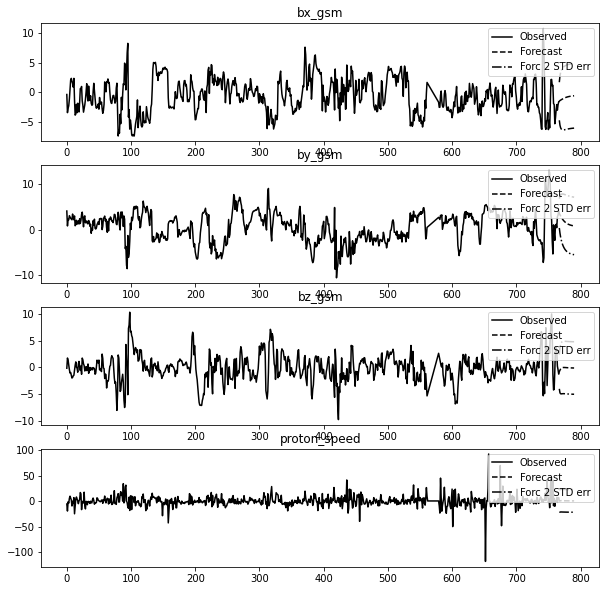

In [67]:
model_fit.plot_forecast(steps=len(test_hour))
plt.show()

In [68]:
pred_hour = model_fit.forecast(train_hour.values[-7:], steps=len(test_hour))

In [69]:
pred_hour

array([[-1.50175909,  3.61156174, -0.8067595 ,  0.06536125],
       [-1.38274279,  3.30922971, -0.53223412,  0.21224932],
       [-1.31546794,  3.03305604, -0.3194215 ,  0.73027218],
       [-1.25030215,  2.77498535, -0.17554892,  0.7624432 ],
       [-1.18353604,  2.53777934, -0.09232892,  0.69150143],
       [-1.11978873,  2.32368565, -0.0489986 ,  0.64970181],
       [-1.06031917,  2.13212309, -0.02924718,  0.6177981 ],
       [-1.00504603,  1.96152486, -0.02339752,  0.58342938],
       [-0.95395235,  1.81009948, -0.0256222 ,  0.54882668],
       [-0.90705156,  1.67599129, -0.03223619,  0.51643575],
       [-0.86426221,  1.55737439, -0.04094703,  0.48679238],
       [-0.82541798,  1.45252949, -0.05038567,  0.45988296],
       [-0.79030188,  1.35988277, -0.059767  ,  0.43563388],
       [-0.75866762,  1.27801664, -0.0686651 ,  0.41391445],
       [-0.73025366,  1.20566676, -0.07687234,  0.39453988],
       [-0.70479437,  1.14171248, -0.08431119,  0.3773025 ],
       [-0.68202845,  1.

In [70]:
hourly_forecast=pd.DataFrame(data=pred_hour, index=hourly.index[-24:], columns=hourly.columns)

In [71]:
entry = pd.DataFrame(hourly.iloc[[-24]])

In [72]:
hourly_forecast = pd.concat([entry, hourly_forecast])

In [73]:
for i in range(1,len(hourly_forecast)):
    hourly_forecast['proton_speed'][i] =  hourly_forecast['proton_speed'][i] + hourly_forecast['proton_speed'][i-1]

hourly_forecast

,bx_gsm,by_gsm,bz_gsm,proton_speed
time,,,,
2021-07-29 00:00:00,-2.838667,2.840833,-1.253667,533.401667
2021-07-29 00:00:00,-1.501759,3.611562,-0.806760,533.467028
2021-07-29 01:00:00,-1.382743,3.309230,-0.532234,533.679277
2021-07-29 02:00:00,-1.315468,3.033056,-0.319422,534.409549
2021-07-29 03:00:00,-1.250302,2.774985,-0.175549,535.171993
2021-07-29 04:00:00,-1.183536,2.537779,-0.092329,535.863494
2021-07-29 05:00:00,-1.119789,2.323686,-0.048999,536.513196
2021-07-29 06:00:00,-1.060319,2.132123,-0.029247,537.130994
2021-07-29 07:00:00,-1.005046,1.961525,-0.023398,537.714423


In [74]:
hourly_forecast = hourly_forecast.iloc[1:]

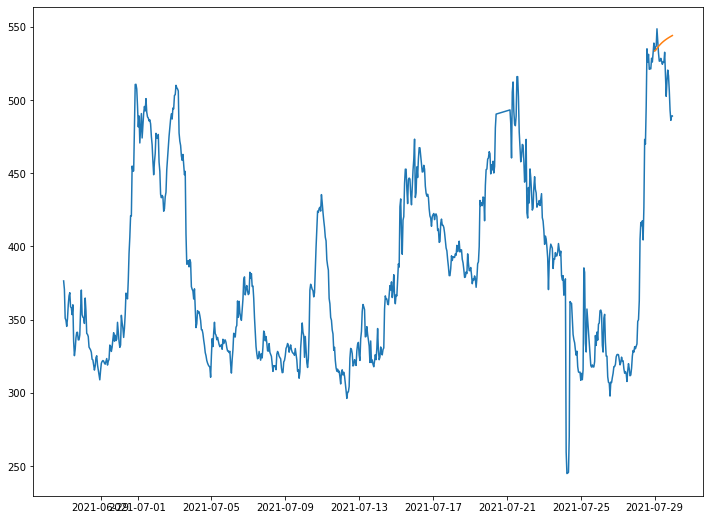

In [75]:
plt.figure(figsize=(12, 9))
plt.plot(hourly['proton_speed'])
plt.plot(hourly_forecast['proton_speed'])
plt.show()

In [92]:
train_sh = hourly_copy[train_hour.columns[3]][:-100]
test_sh = hourly_copy[train_hour.columns[3]][-100:]

In [93]:
sarima_model = pm.auto_arima(train_sh,
                               start_p =0,
                               start_q = 0,
                               max_p = 12,max_d = 12,max_q = 12,
                               start_P = 0,D = 0,start_Q = 0,max_P = 12,
          max_Q = 12,max_D = 12,
          seasonal = False,n_fits=2000,m = 0, stepwise=True,trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5304.257, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5299.126, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5296.916, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5291.413, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5290.454, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5291.397, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5292.204, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5292.023, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5290.588, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5291.806, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5293.817, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5292.440, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 2.701 seconds


In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
mod = ARIMA(train_sh, order=(2,0,1))

res = mod.fit()
print(res.summary())

C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\Downloads\TimeSeries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           proton_speed   No. Observations:                  691
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2641.220
Date:                Sun, 22 May 2022   AIC                           5292.440
Time:                        22:34:46   BIC                           5315.131
Sample:                    06-27-2021   HQIC                          5301.217
                         - 07-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0524      0.468     -0.112      0.911      -0.970       0.865
ar.L1         -0.2814      0.163     -1.728      0.084      -0.601       0.038
ar.L2         -0.0839      0.042     -1.996      0.0

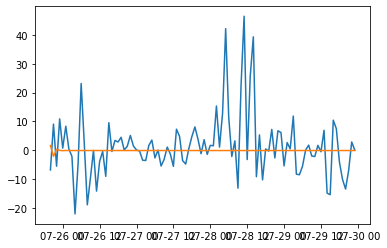

In [96]:
F = res.forecast(100)

plt.plot(test_sh)
plt.plot(F)

plt.savefig('arima.png', bbox_inches='tight')